# START! (Placeholder)

In [ ]:
#
# This is nathan's cell. Nathan's cell says hi.
#
print("Hello team!")

In [2]:
import pandas as pd
import seaborn as sns

## Reading in Data

In [34]:
#Defensive Data, all brought together.

def_data_list= ["defense_acc.csv", "defense_big12.csv", "defense_american.csv", "defense_bigten.csv", 
                "defense_independent.csv", "defense_mac.csv", "defense_mountainwest.csv", "defense_pac12.csv",
                "defense_sec.csv", "defense_sunbelt.csv"]

df_defense = []

def defense(data):
    df = pd.read_csv("rawdata/" + data)
    df = df.groupby("Team").mean()
    df = df.rename(columns = {"Yds": "Yds_def", "Avg": "Avg_def"})

    return df

for i in def_data_list:
    df = defense(i)
    df_defense.append(df)

result = pd.concat(df_defense)

result

    

,Int,Yds_def,Avg_def,TD,Solo,Ast,Tot,Sack,YdsL
Team,,,,,,,,,
BC,2.000000,36.777778,16.921111,0.222222,25.111111,19.555556,44.666667,1.111111,7.222222
CLEM,1.333333,36.444444,28.018889,0.222222,31.666667,19.111111,50.777778,1.222222,7.666667
DUKE,1.000000,19.000000,19.000000,0.250000,32.500000,14.000000,46.500000,0.500000,3.250000
FSU,1.714286,17.857143,13.035714,0.142857,31.428571,18.857143,50.285714,0.500000,2.857143
GT,1.222222,25.666667,19.611111,0.222222,22.111111,15.444444,37.555556,0.666667,4.888889
...,...,...,...,...,...,...,...,...,...
LA,1.000000,8.875000,8.875000,0.000000,19.625000,9.500000,29.125000,0.375000,2.625000
TROY,1.500000,26.833333,14.458333,0.083333,21.666667,21.833333,43.500000,1.458333,9.833333
TXST,0.750000,9.250000,6.062500,0.125000,16.875000,10.500000,27.375000,0.250000,1.375000


In [24]:
# Reading in Rushing Data

rushing_df = pd.read_csv("rushing.csv")
rushing_df

,Player,Team,Att,Gain,Loss,Yds,Avg,Lg,TD,Stat Type
0,Jonathan Taylor,WISC,307,"2,227",33,"2,194",7.15,88t,16,Rushing
1,Miles Sanders,PSU,220,"1,318",44,"1,274",5.79,78,9,Rushing
2,Karan Higdon,MICH,224,"1,220",42,"1,178",5.26,67t,10,Rushing
3,Mohamed Ibrahim,MINN,202,"1,176",16,"1,160",5.74,74,9,Rushing
4,Stevie Scott,IND,228,"1,155",18,"1,137",4.99,45,10,Rushing
...,...,...,...,...,...,...,...,...,...,...
95,Riley Lees,NW,9,39,4,35,3.89,18,1,Rushing
96,Tario Fuller,PUR,14,43,9,34,2.43,12,0,Rushing
97,Kyric McGowan,NW,3,38,4,34,11.33,21,0,Rushing
98,Peyton Mansell,IOWA,8,38,7,31,3.88,13,1,Rushing


In [24]:
# Reading in Receiving Data

receiving_df = pd.read_csv("receiving.csv")
receiving_df

,Player,Team,Rec,Yds,Avg,Lg,TD,Stat Type
0,Rondale Moore,PUR,114,"1,258",11.04,70t,12,Receiving
1,Parris Campbell,OSU,89,985,11.07,71t,11,Receiving
2,Tyler Johnson,MINN,78,"1,169",14.99,52,12,Receiving
3,Flynn Nagel,NW,68,780,11.47,61t,2,Receiving
4,K.J. Hill,OSU,68,865,12.72,42,6,Receiving
...,...,...,...,...,...,...,...,...
95,Mike Epstein,ILL,10,86,8.60,32,0,Receiving
96,Carmoni Green,ILL,10,93,9.30,25,0,Receiving
97,LJ Scott,MSU,10,95,9.50,32,0,Receiving
98,Charlie Fessler,NW,10,101,10.10,17,0,Receiving


<bound method Grid.add_legend of <seaborn.axisgrid.PairGrid object at 0x1291589d0>>

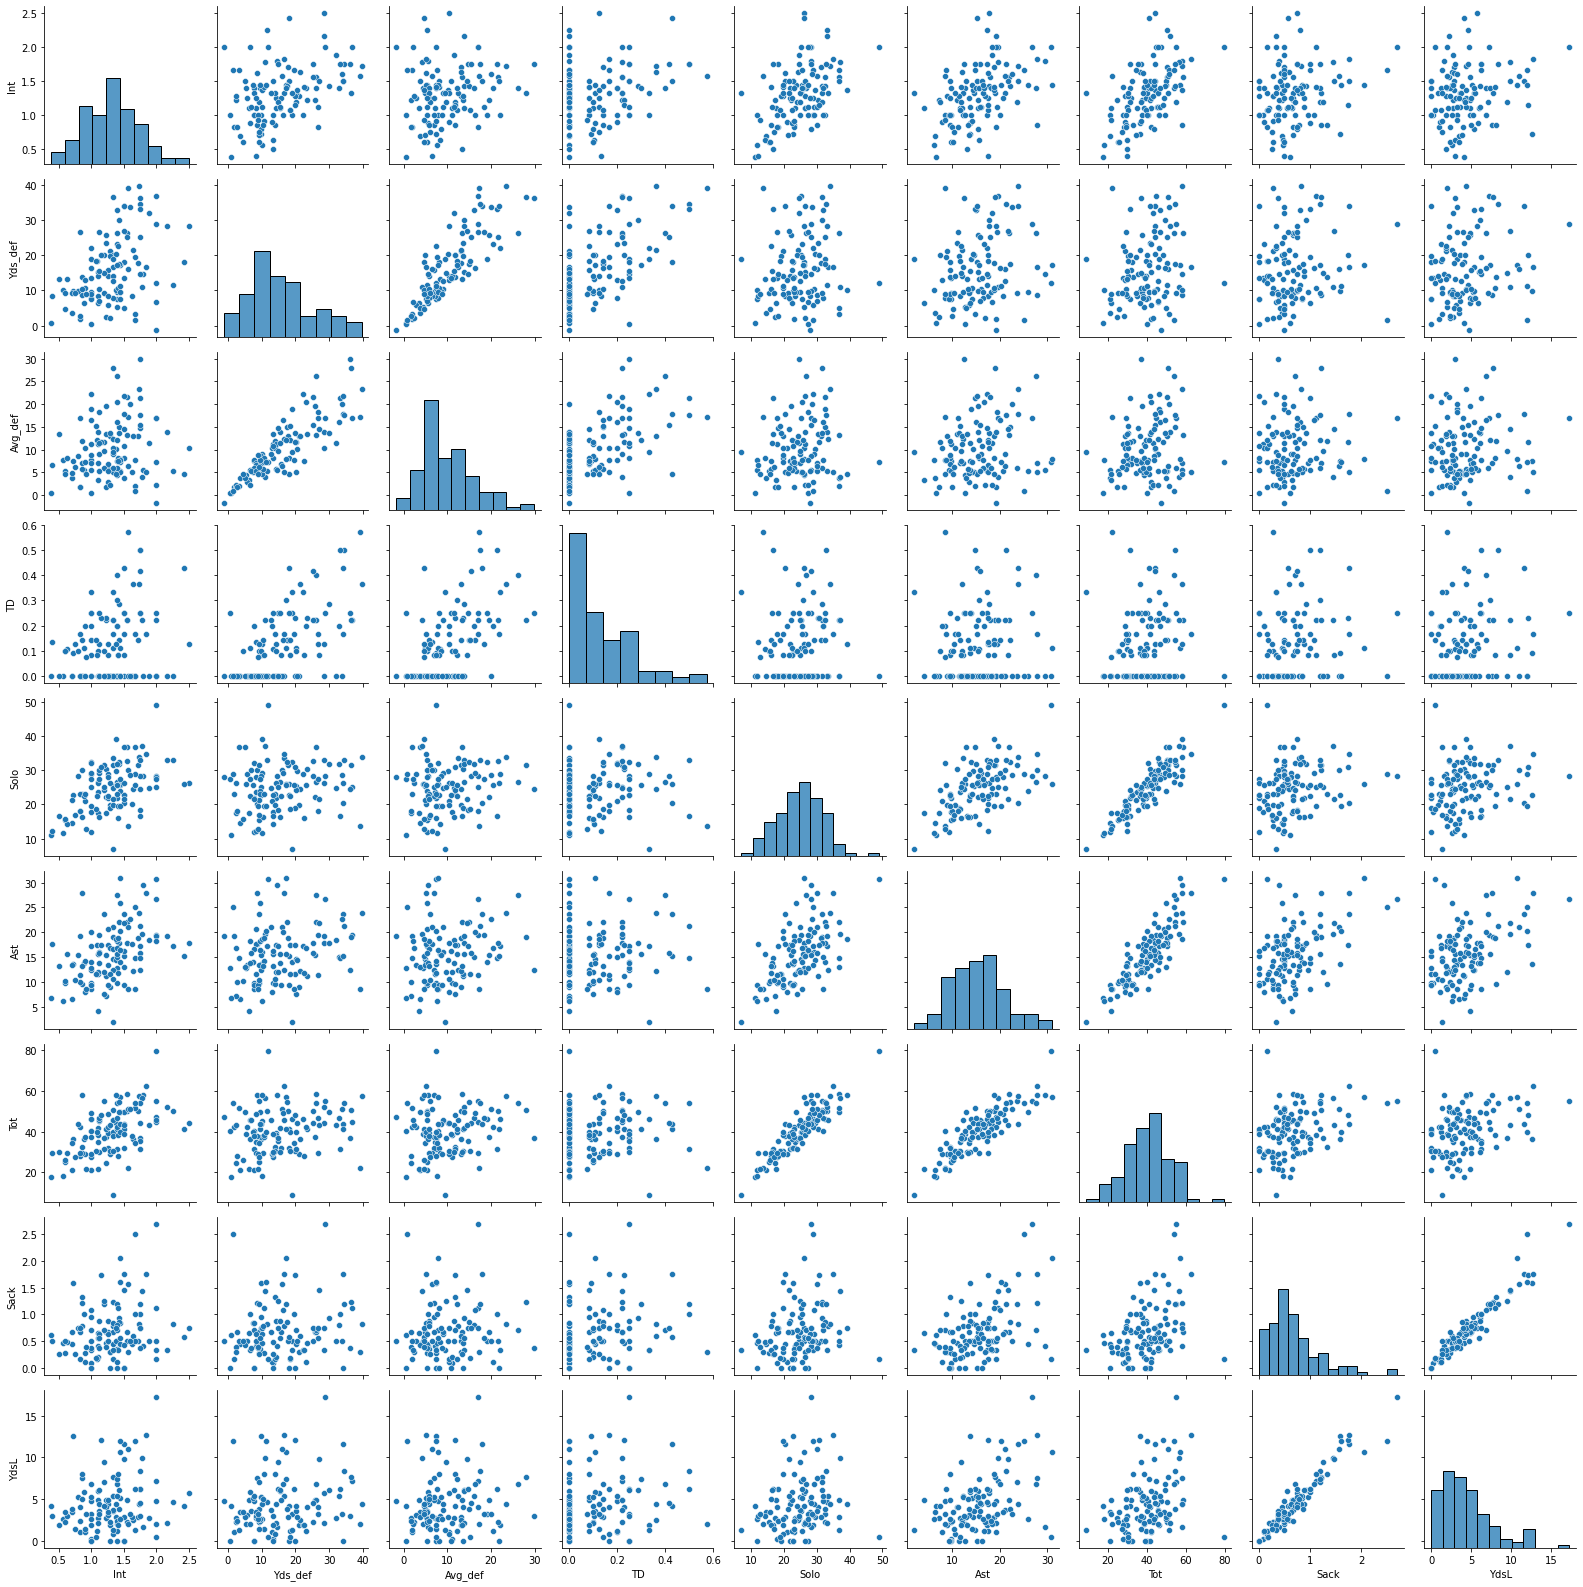

In [35]:
# Why in the world is Yds not here??? 
# This is JUST for defense!

g = sns.PairGrid(result)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend

